In [1]:
!pip install keras

In [2]:
!pip install tensorflow

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [5]:
gas_data = pd.read_csv("gas_turbines.csv")
gas_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [6]:
gas_data.shape

(15039, 11)

In [7]:
gas_data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [8]:
gas_data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [9]:
gas_data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


<AxesSubplot:>

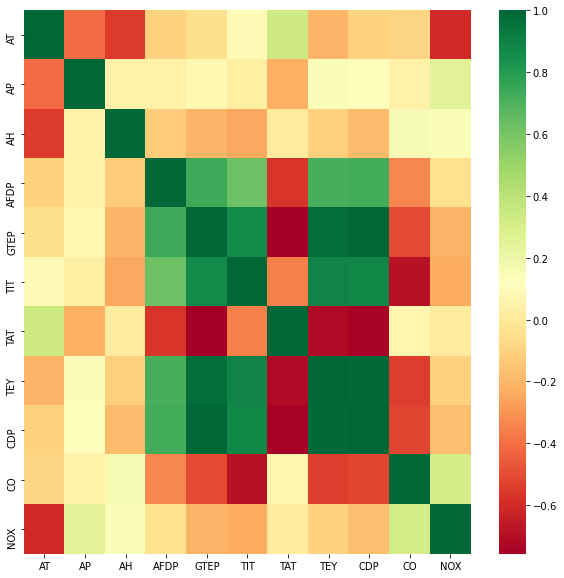

In [10]:
# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(gas_data.corr(),cmap="RdYlGn")

In [11]:
# Data processing
TargetVariable=['TEY']
Predictors=['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX']

X=gas_data[Predictors].values
y=gas_data[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10527, 10)
(10527, 1)
(4512, 10)
(4512, 1)


In [12]:
# Model Bulding and Training
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units = 50, input_dim = 10, activation = 'relu', kernel_initializer = 'normal'))
model.add(Dense(units = 25, activation = 'tanh', kernel_initializer='normal'))
model.add(Dense(units = 1, activation = 'relu', kernel_initializer='normal'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                550       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['accuracy'])

In [15]:
model.fit(x=X_train,y=y_train,epochs=100)

Epoch 1/100
329/329 [==============================] - 15s 10ms/step - loss: 0.4162 - accuracy: 0.0000e+003s - loss: 0.6027 - accuracy: 0.00 - ETA: 2s - los - ETA: 0s - loss: 0.4204 - accuracy
Epoch 2/100
329/329 [==============================] - 3s 9ms/step - loss: 0.3684 - accuracy: 0.0000e+00: 
Epoch 3/100
329/329 [==============================] - 3s 10ms/step - loss: 0.3668 - accuracy: 0.0000e+00 2s - loss: - E
Epoch 4/100
329/329 [==============================] - 3s 10ms/step - loss: 0.3659 - accuracy: 0.0000e+00
Epoch 5/100
329/329 [==============================] - 3s 10ms/step - loss: 0.3663 - accuracy: 0.0000e+00 2s
Epoch 6/100
329/329 [==============================] - 3s 10ms/step - loss: 0.3657 - accuracy: 0.0000e+00
Epoch 7/100
329/329 [==============================] - 3s 10ms/step - loss: 0.3648 - accuracy: 0.0000e+00
Epoch 8/100
329/329 [==============================] - 3s 10ms/step - loss: 0.3646 - accuracy: 0.0000e+00 1s - loss: 0.3759 - accura
Epoch 9/100
329/329

In [16]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 

# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 67.14646456417461
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 60.250544873886106
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 55.15660719049672
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 61.53203170494005
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 47.52132017344149
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 59.957279753932255
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 58.08257074349257
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 65.9916246280433
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 79.67572132109345
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 74.10339767424861
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 67.22941300530076
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 70.85580324926893
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 59.979577696330885
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 56.675998613897384
15 Parameters: ba

<AxesSubplot:xlabel='Parameters'>

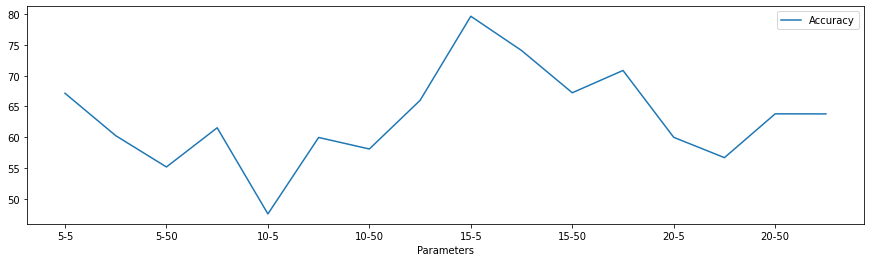

In [17]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [18]:
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=1)

Epoch 1/5
702/702 [==============================] - 6s 9ms/step - loss: 0.3639 - accuracy: 0.0000e+00
Epoch 2/5
702/702 [==============================] - 6s 9ms/step - loss: 0.3635 - accuracy: 0.0000e+00
Epoch 3/5
702/702 [==============================] - 6s 9ms/step - loss: 0.3636 - accuracy: 0.0000e+00
Epoch 4/5
702/702 [==============================] - 6s 8ms/step - loss: 0.3632 - accuracy: 0.0000e+00
Epoch 5/5
702/702 [==============================] - 6s 8ms/step - loss: 0.3631 - accuracy: 0.0000e+00


In [19]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=1)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['TEY']=y_test_orig
TestingData['PredictedTEY']=Predictions
TestingData.head()

Epoch 1/5
702/702 [==============================] - 6s 9ms/step - loss: 0.3627 - accuracy: 0.0000e+00
Epoch 2/5
702/702 [==============================] - 7s 10ms/step - loss: 0.3633 - accuracy: 0.0000e+00
Epoch 3/5
702/702 [==============================] - 8s 12ms/step - loss: 0.3633 - accuracy: 0.0000e+00 0s - loss: 0.3650 - accuracy: 0.
Epoch 4/5
702/702 [==============================] - 8s 12ms/step - loss: 0.3637 - accuracy: 0.0000e+00 
Epoch 5/5
702/702 [==============================] - 9s 13ms/step - loss: 0.3633 - accuracy: 0.0000e+00


,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY,PredictedTEY
0,24.093,1010.2,75.821,4.0023,25.762,1092.5,550.25,12.219,1.2643,60.954,134.46,134.497498
1,20.450,1014.4,90.471,3.2106,20.085,1059.6,549.94,10.791,2.6937,56.658,111.88,134.188461
2,20.262,1012.5,82.892,4.5325,25.221,1089.9,549.62,12.126,1.9625,64.937,133.72,134.188461
3,26.862,1012.3,70.267,4.4266,25.965,1092.9,549.96,12.218,1.5712,64.836,133.79,134.188461
4,19.409,1006.3,90.525,3.1241,19.688,1056.9,550.01,10.466,2.2996,58.706,110.77,134.188461


In [22]:
# Computing the absolute percent error of Testing Data
APE=100*(abs(TestingData['TEY']-TestingData['PredictedTEY'])/TestingData['TEY'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head(20)

The Accuracy of ANN model is: 94.76323150851928


,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY,PredictedTEY,APE
0,24.0930,1010.2,75.821,4.0023,25.762,1092.5,550.25,12.219,1.26430,60.954,134.46,134.497498,0.027888
1,20.4500,1014.4,90.471,3.2106,20.085,1059.6,549.94,10.791,2.69370,56.658,111.88,134.188461,19.939633
2,20.2620,1012.5,82.892,4.5325,25.221,1089.9,549.62,12.126,1.96250,64.937,133.72,134.188461,0.350330
3,26.8620,1012.3,70.267,4.4266,25.965,1092.9,549.96,12.218,1.57120,64.836,133.79,134.188461,0.297826
4,19.4090,1006.3,90.525,3.1241,19.688,1056.9,550.01,10.466,2.29960,58.706,110.77,134.188461,21.141520
5,2.2158,1013.1,88.695,3.3709,19.387,1058.9,550.17,10.624,4.27640,99.759,113.32,134.188461,18.415515
6,23.8520,1002.2,84.186,3.7871,25.392,1089.7,550.11,12.088,0.83578,59.426,133.77,134.188461,0.312821
7,12.3950,1019.5,95.381,4.2837,23.225,1079.4,549.60,11.498,2.01980,75.260,128.98,134.188461,4.038193
8,12.3590,1022.7,82.295,5.1559,32.518,1100.1,528.98,13.971,0.87760,66.416,159.42,160.246002,0.518130
9,8.6376,1001.6,98.271,5.9309,32.105,1100.0,530.69,13.862,10.75000,102.130,161.86,161.383972,0.294098


##### Insight:
* The accuracy of a testing data of ANN model is found that 94.76%
* The Predicted value of TEY is found using ANN model.